# `get_successor` en un BST

Cuando trabajamos con árboles de búsqueda binaria (BST), a menudo necesitamos encontrar el sucesor de un nodo dado, es decir, el nodo que sigue inmediatamente al nodo dado en el orden de los elementos. En el contexto de un BST, el sucesor de un nodo es el nodo con la data más pequeña que sea mayor que la data del nodo dado. Este concepto es particularmente útil en operaciones como la eliminación de nodos o la iteración en orden sobre los elementos del árbol.

El sucesor de un nodo en un BST se puede determinar de la siguiente manera:
- Si el nodo tiene un subárbol derecho, el sucesor es el nodo más a la izquierda en ese subárbol derecho.
- Si el nodo no tiene un subárbol derecho, el sucesor es el primer ancestro en cuyo lado izquierdo se encuentra el nodo.

## Implementación en Python

Para implementar la función `get_successor`, primero definimos dos funciones auxiliares: una para encontrar el mínimo en un subárbol (necesario cuando el nodo tiene un subárbol derecho) y otra para buscar el nodo dado dentro del árbol y encontrar su sucesor siguiendo las reglas mencionadas.

Aquí te muestro cómo implementar este método en la clase [`BST`](src/BST.py): 

In [6]:
# Código utilitario
from src.visualization import visualize_bt
# ver src/BinaryTree.py
from src.BST import BST

In [7]:
# Encontrar el mínimo en un árbol binario de búsqueda.
def find_min(self, node):
    current = node
    # Se desplaza hacia el nodo más a la izquierda para encontrar el mínimo.
    while current.left:
        current = current.left
    return current

# Obtener el sucesor de un valor dado en un árbol binario de búsqueda.
def get_successor(self, data):
    # Busca el nodo y su respectivo padre dado un valor.
    node, parent = self.search_node_and_parent(data)
    if node.right:
        # Si existe subárbol derecho, el sucesor es el mínimo de ese subárbol.
        return self.find_min(node.right).data
    else:
        # Si no, se busca ascendiendo en el árbol.
        successor = None
        ancestor = self.root
        while ancestor != node:
            # Si el valor del nodo es menor que el valor del ancestro,
            # entonces el ancestro podría ser el sucesor.
            if node.data < ancestor.data:
                successor = ancestor
                ancestor = ancestor.left
            else:
                ancestor = ancestor.right
        # Retorna el valor del sucesor si existe, si no, retorna None.
        return successor.data if successor else None

# Método para buscar un nodo y su nodo padre en un árbol binario de búsqueda.
def search_node_and_parent(self, data):
    node = self.root
    parent = None
    # Continúa la búsqueda hasta encontrar el nodo o hasta que los nodos se acaben.
    while node and node.data != data:
        parent = node
        # Se desplaza a la izquierda si el dato es menor que el actual,
        # de lo contrario, se desplaza a la derecha.
        if data < node.data:
            node = node.left
        else:
            node = node.right
    # Retorna tanto el nodo como su padre.
    return node, parent


# Extender la clase BST con el nuevo método
BST.find_min = find_min
BST.get_successor = get_successor
BST.search_node_and_parent = search_node_and_parent

## Pruebas `get_successor`

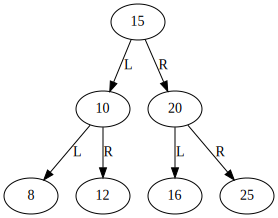

El sucesor de 10 es: 12
El sucesor de 15 es: 16


In [8]:
# Crear un BST y añadir elementos
bst = BST()
for data in [15, 10, 20, 8, 12, 16, 25]:
    bst.insert(data)

# Visualizar el árbol
dot = visualize_bt(bst)
display(dot)

# Probar get_successor
print("El sucesor de 10 es:", bst.get_successor(10))
print("El sucesor de 15 es:", bst.get_successor(15))

## Complejidad del Algoritmo

La complejidad temporal del método `get_successor` es O(h), donde h es la altura del árbol. Esto se debe a que en el peor caso puede ser necesario recorrer desde la raíz hasta la hoja más profunda (por ejemplo, cuando buscamos el sucesor del máximo elemento). En un árbol balanceado, esto es O(log n), donde n es el número de nodos en el árbol. Sin embargo, en el peor de los casos (un árbol degenerado), la complejidad puede ser O(n).

La complejidad espacial del algoritmo es O(1), ya que solo se utilizan variables temporales y no se depende del tamaño del árbol para la asignación de memoria.

## Ejercicios Prácticos

1. Implementa una función que, dado un valor específico en el BST, encuentre su predecesor (el nodo con el valor máximo que sea menor que el valor dado).
2. Escribe una función en BST para imprimir todos los sucesores de todos los nodos en un arreglo, ordenados.

## Soluciones a los Ejercicios

Para resolver estos ejercicios, primero implementaremos la función para encontrar el predecesor de un nodo dado en un Árbol Binario de Búsqueda (BST). Después, desarrollaremos una función que imprima todos los sucesores de todos los nodos en un arreglo ordenado. Estas funciones se basarán en la clase `BST` y sus métodos ya definidos.

#### Ejercicio 1: Encontrar el Predecesor

El predecesor en un BST, para un nodo dado, es el nodo con el valor máximo que sea menor que el valor del nodo dado. Para encontrar el predecesor, podemos seguir una lógica similar a la del sucesor, pero invertida.

In [9]:
# Encontrar el máximo en un árbol binario de búsqueda.
def find_max(self, node):
    current = node
    # Se desplaza hacia el nodo más a la derecha para encontrar el máximo.
    while current.right:
        current = current.right
    return current

# Obtener el predecesor de un valor dado en un árbol binario de búsqueda.
def get_predecessor(self, data):
    # Busca el nodo y su respectivo padre dado un valor.
    node, parent = self.search_node_and_parent(data)
    if node.left:
        # Si existe subárbol izquierdo, el predecesor es el máximo de ese subárbol.
        return self.find_max(node.left).data
    else:
        # Si no, se busca ascendiendo en el árbol.
        predecessor = None
        ancestor = self.root
        while ancestor != node:
            # Si el valor del nodo es mayor que el valor del ancestro,
            # entonces el ancestro podría ser el predecesor.
            if node.data > ancestor.data:
                predecessor = ancestor
                ancestor = ancestor.right
            else:
                ancestor = ancestor.left
        # Retorna el valor del predecesor si existe, si no, retorna None.
        return predecessor.data if predecessor else None


BST.find_max = find_max
BST.get_predecessor = get_predecessor

### Ejercicio 2: Imprimir Todos los Sucesores de Todos los Nodos en un Arreglo Ordenado

Para este ejercicio, utilizaremos un recorrido del árbol para recolectar todos los nodos en un arreglo. Luego, para cada nodo en el arreglo, encontraremos su sucesor utilizando el método `get_successor` definido anteriormente.

In [10]:
def inorder_traversal(self, node, arr):
    if node:
        self.inorder_traversal(node.left, arr)
        arr.append(node.data)
        self.inorder_traversal(node.right, arr)

def print_successors(self):
    nodes = []
    self.inorder_traversal(self.root, nodes)
    # Dado que los nodos ya están ordenados, el sucesor de cada nodo
    # es simplemente el siguiente nodo en el arreglo.
    successors = [self.get_successor(data) for data in nodes]
    return successors

BST.inorder_traversal = inorder_traversal
BST.print_successors = print_successors

Es importante notar que para imprimir efectivamente todos los sucesores de todos los nodos en orden, podríamos simplemente hacer uso del hecho de que un recorrido en orden de un BST ya nos da los valores en orden ascendente. Así, para cada nodo excepto el último, su sucesor es el siguiente nodo en el recorrido en orden. Sin embargo, para cumplir con el ejercicio como fue solicitado, utilizamos el método `get_successor` para demostrar su aplicabilidad en un contexto más amplio.